# Taller 3 - Pandas

**Métodos computacionales para las políticas públicas** <br> 
_Universidad del Rosario_ 2023-I

**Nombre**: Jorge De León <br>
**Correo electrónico**: jorge.deleon@uroaario.edu.co <br>
***
<h3><center> Instrucciones </center></h3>

- Complete con su nombre completo y el correo electrónico.
- Guárdelo con el formato: _apellidos\_nombre\_TallerN. Donde N hace referencia al número del taller.
- En el caso de que la respuesta sea un texto, se indicará con la palabra Respuesta en formato texto, en cuyo caso el formato a utilizar será Markdown. En caso contrario el formato a utilizar será Code y será señalizado con `# Respuesta`. Si fuera necesario hacer alguna aclaración en este último formato, se hará con comentario en el código.
- Con el objetivo de crear una buena práctica en la creación del código, cuando la respuesta sea código, explicar **cada línea** del mismo en un comentario corto pero explicativo.
- Una vez finalizada la actividad suba a e-aulas este _Jupyter Notebook_ solucionado.
- El taller debe ser subido tanto en formato `.ipynb` como `.pdf`.
- Los talleres se realizan de forma <b>individual</b>. En caso de haber dos o más talleres con el mismo contenido, será considerado como <b><i>plagio</i></b>.
- Fecha límite de entrega: viernes 17 de marzo a las 11:59 pm.
***

***
**Ejercicio 1.** En su trabajo diario en el Departamento de Planeación de la entidad en la que trabaja, usted debe almacenar información sobre el nombre de cada municipio y el número de becas que le va a asignar a sus habitantes. Dado que son datos de acceso público, es importante garantizar que dichos datos sean inmodificables.

**Por lo anterior, usted tiene que elegir guardarlo en una estructura de datos que dificulte su manipulación una vez usted obtiene el nombre de cada municipio y la cantidad de becas asignadas respectivamente. ¿Qué estructura elegiría y por qué?**

Tuplas ya que no se pueden modificar
***

**Ejercicio 2.** Importar los datos y hacer las primeras tablas descriptivas.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

datos = pd.read_csv('regional_codes.csv')

a) En el siguiente [link](https://ourworldindata.org/grapher/gender-wage-gap-vs-gdp-per-capita), descargue los datos `gender-wage-gap-vs-gdp-per-capita.csv` y cárguelos en una variable que se denomine `data`.

In [2]:
data = pd.read_csv("gender-wage-gap-vs-gdp-per-capita.csv")

b) Haga un resumen de las 5 primeras filas del dataframe y, una vez realizado, saque las principales estadíticas descriptivas</font> para cada variable numérica.

In [3]:
print(data.head())

print(data.mean())
print(data.median())
print(data.std)


        Entity      Code  Year  Gender wage gap (%)  \
0     Abkhazia  OWID_ABK  2015                  NaN   
1  Afghanistan       AFG  2002                  NaN   
2  Afghanistan       AFG  2003                  NaN   
3  Afghanistan       AFG  2004                  NaN   
4  Afghanistan       AFG  2005                  NaN   

   GDP per capita, PPP (current international $)  \
0                                            NaN   
1                                     877.014282   
2                                     927.857544   
3                                     925.441406   
4                                    1023.051758   

   Population (historical estimates) Continent  
0                                NaN      Asia  
1                         21000258.0       NaN  
2                         22645136.0       NaN  
3                         23553554.0       NaN  
4                         24411196.0       NaN  
Year                                             1.603052e+03


C:\Users\Jorge De León\AppData\Local\Temp\ipykernel_3332\4285833853.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data.mean())
C:\Users\Jorge De León\AppData\Local\Temp\ipykernel_3332\4285833853.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data.median())


c) Extraiga los nombres de las columnas en formato lista y guárdelos en la variable `data_columns`. Además, compruebe si hay alguna variable que represente el GDP nominal dentro de la lista.

In [4]:
data_columns = list(data.columns)
data_columns

#Ninguna contiene el GDP nominal.

['Entity',
 'Code',
 'Year',
 'Gender wage gap (%)',
 'GDP per capita, PPP (current international $)',
 'Population (historical estimates)',
 'Continent']

**Ejercicio 3.** Adaptar los datos para facilitar su uso.

a) Genere una lista de las variables de interés para el primer análisis (Code, Year, Gender wage gap, GDP per capita) utilizando la lista `data_columns` creada previamente y guárdela en `interest_columns`.

In [5]:
interest_columns = data_columns[1:5]
interest_columns

['Code',
 'Year',
 'Gender wage gap (%)',
 'GDP per capita, PPP (current international $)']

b) Filtre el dataframe para que sólo queden las variables `interest_columns`. y guarde ese resultado en una variable que se llame `gender_gap`.

In [6]:
gender_gap = data.loc[:,interest_columns]
gender_gap.head()

,Code,Year,Gender wage gap (%),"GDP per capita, PPP (current international $)"
0,OWID_ABK,2015,NaN,NaN
1,AFG,2002,NaN,877.014282
2,AFG,2003,NaN,927.857544
3,AFG,2004,NaN,925.441406
4,AFG,2005,NaN,1023.051758


c) Cambie el nombre de las variables a "CountryName", "Code", "Year", "GenderGap", "GDPpc", "Population", "Continent" respectivamente, luego imprima las 5 primeras filas de su dataframe con los nombres de las variables ajustadas.

In [7]:
data = data.rename(columns={'Entity' : 'CountryName', 'Code' : 'Code', 'Year' : 'Year', 'Gender wage gap (%)' : 'GenderGap',
                            'GDP per capita, PPP (current international $)' : 'GDPpc' , 'Population (historical estimates)' : 'Population', 'Continent' : 'Continent' })

data.head()

,CountryName,Code,Year,GenderGap,GDPpc,Population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,877.014282,21000258.0,NaN
2,Afghanistan,AFG,2003,NaN,927.857544,22645136.0,NaN
3,Afghanistan,AFG,2004,NaN,925.441406,23553554.0,NaN
4,Afghanistan,AFG,2005,NaN,1023.051758,24411196.0,NaN


d) Calcular:

        1. El primer año disponible con un mensaje que diga "El primer año disponible es:"
        
        
        2. El año más reciente con un mensaje que diga "El año más reciente es: ".
        
        
        3. El Gender Gap más alto del dataframe.

In [8]:
minimo = data[['Year']].min()
print(f"El primer año disponible es: {minimo}")

maximo = data[['Year']].max()
print(f'El año más reciente es: {maximo}')

gendermax = data[['GenderGap']].max()
print(f'El GenderGap más alto es: {gendermax}')

El primer año disponible es: Year   -10000
dtype: int64
El año más reciente es: Year    2021
dtype: int64
El GenderGap más alto es: GenderGap    35.75
dtype: float64


Describa brevemente si encuentra alguna inconsistencia en los datos de su dataframe (e.g. missing values, NaNs, outliers, etc...)

Respuesta [Texto]
***

**Ejercicio 4.**

a) Para hacer un estudio más reciente, filtre los datos del año 2000 al último año disponible. Guárdelo en la misma variable `gender_gap`.

In [9]:
gender_gap = data[data['Year'] >= 2000]

gender_gap.Year.head()

0    2015
1    2002
2    2003
3    2004
4    2005
Name: Year, dtype: int64

b) Realice un scatter plot donde la `x` sea el GDPpc y la `y` sea el Gender Gap. Ponga etiquetas descriptivas en los dos ejes. 

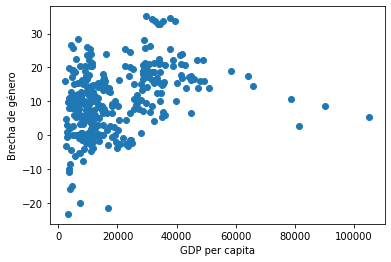

In [10]:
plt.plot(gender_gap['GDPpc'], gender_gap['GenderGap'], "o")
plt.ylabel('Brecha de género')
plt.xlabel('GDP per capita')
plt.show()

c) ¿Qué puede inferir con respecto a los resultados de la gráfica?

A medida que  aumenta el GDP per capita se observa que aumenta de igual manera la brecha de genero. 


d) Importe la carpeta `regional_codes.csv` que se encuentra en e-aulas y almacénela en una variable que se llame `codes`, luego imprima las 5 primeras filas para conocer qué datos trae.

In [11]:
codes = pd.read_csv('regional_codes.csv')
codes.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


e) Filtre el dataframe para que sólo queden las columnas alpha-3, region y subregión y guárdelo en la misma variable. Por último, cambie los nombres de las columnas por "Code", "region" y "subregion" respectivamente.

In [12]:
codes = codes.iloc[:, [2, 5, 6]]

codes = codes.rename(columns={'alpha-3' : 'Code', 'region' : 'region' , 'sub-region' : 'subregion'})

**Ejercicio 5.** Unir datasets, limpiar y graficar.

a) Haga una unión `inner` de los datos de `gender_gap`y `code`a través de la(s) variable(s) que considere.

In [13]:
new_data = pd.merge(gender_gap, codes, on = ['Code'])

b) Elimine todas aquellas filas que no tengan valores en Gender Gap.

In [14]:
new_data = new_data.dropna()

In [15]:
print(new_data['subregion'].unique())

['Latin America and the Caribbean' 'Eastern Europe' 'Western Asia'
 'South-eastern Asia' 'Southern Europe' 'Eastern Asia' 'Northern Europe']


c) Vuelva a hacer el scatter plot aplicando colores a cada subregión.

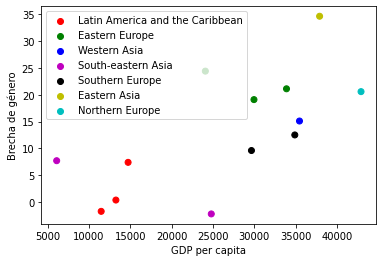

In [16]:
colormap = {'Latin America and the Caribbean': "r", 'Eastern Europe': "g", 'Western Asia': "b", 'South-eastern Asia' : "m" , 'Southern Europe' : "k", 
          'Eastern Asia' : "y", 'Northern Europe' : "c"}
colors = [colormap[val] for val in new_data['subregion']]
plt.scatter(new_data['GDPpc'], new_data['GenderGap'], c=colors)
plt.ylabel('Brecha de género')
plt.xlabel('GDP per capita')
for category, color in colormap.items():
    plt.scatter([], [], c=color, label=category)

plt.legend()
plt.show()

d) ¿Qué puede observar de la gráfica anterior?

Respuesta: Exceptuando el sudeste asiatico parece haber una relación positiva entre el GDP per capita y la brecha de género. Las regiones con el GDP per capita más alto presentan a su vez una brecha de género mayor.

**Ejercicio 6.** Análisis de un subset

a ) Haga un filtro al dataframe de interés (`gender_gap`) que mantenga sólo los países de 'Latin America and the Caribbean' y guárdelo en la variable `gender_latam`.

In [21]:
gender_latam = new_data[new_data['subregion'] == 'Latin America and the Caribbean']

b) Calcule la media de GDPpc y GenderGap por país <font color=blue> y </font> guárdela en la variable `gender_latam_bycountry`.

In [22]:
gender_latam_bycountry = gender_latam.groupby('Code').mean([['GDPpc', 'GenderGap']])

print(gender_latam_bycountry)


        Year  GenderGap         GDPpc  Population
Code                                             
COL   2015.0       0.34  13265.796875  47119728.0
DOM   2015.0       7.38  14740.827148  10405832.0
PRY   2015.0      -1.77  11486.523438   6177954.0


c) Haga un gráfico de barras con la media de Gender Gap con los valores del eje `x` en vertical.

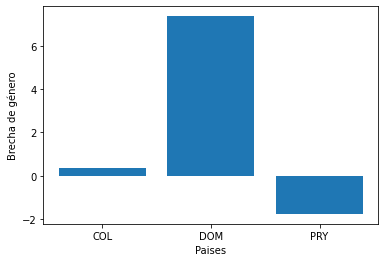

In [23]:
plt.bar(gender_latam_bycountry.index, gender_latam_bycountry['GenderGap'])
plt.xlabel('Paises')
plt.ylabel('Brecha de género')
plt.show()

d) ¿Qué observa en la gráfica?

Dominicana tiene una alta brecha de género mientras Colombia mantiene una brecha baja y Pataguay mantiene una brecha negativa

***
